In [2]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

### Ejemplo F27 Pass Matrix
En este caso Ceballos que fue suplente y completó 27 pases (**pass_success**) con 0 pases incorrectos (**pass_lost**) y su posición media en función de los contactos con pelota es **x =58,26  y=46,09** .Al tener x>50 se trata de campo contrario
*  2 pases correctos a Sergio Ramos
*  9 pases correctos a Toni Kroos
*  1 pase correcto a Carvajal
*  3 pases correctos a Isco
*  2 pases correctos a Bale
*  5 pases correctos a Casemiro
*  1 pase correcto a  Lucas Vázquez
*  1 pase correctos a Benzema
*  3 pases correctos a  Marcelo

![Campo](imagenes/Opta_F27.png)

### Seleccionar aquí el fichero Pass Matrix F27 de Opta 

In [3]:
## Poner aqui la ruta a nuestro archivo
file = ET.parse(r"pass_matrix_23_2018_g1009345_t186.xml") 

In [4]:
namelist= []
xlist =[]
ylist = []
pointslist = []
passer = []
receiver = []
passeslist = []
links = []
poslist = []
pass_success_list = []

for node in file.getroot():
    name = node.attrib.get("player_name")
    x = node.attrib.get("x")
    y = node.attrib.get("y")
    pos = node.attrib.get("position")
    pass_success = node.attrib.get("pass_success")
    namelist.append(name)
    xlist.append(x)
    ylist.append(y)
    poslist.append(pos)
    pass_success_list.append(pass_success)

    for players in node:
            passes = players.text
            name = players.attrib.get("player_name")
            passer.append(node.attrib.get("player_name"))
            receiver.append(name)
            passeslist.append(passes)
                   
 

In [5]:
xlist = [float(i) for i in xlist]

In [6]:
ylist = [float(i) for i in ylist]

In [7]:
for i,j in zip(xlist,ylist):
    point = [i,j]
    pointslist.append(point)
    

In [8]:
pass_success_list = [int(i) for i in pass_success_list]

In [9]:
player_dict = dict(zip(namelist, pointslist))

In [10]:
player_dict

{'Dani Ceballos': [58.26, 46.09],
 'Sergio Ramos': [39.76, 68.77],
 'Toni Kroos': [53.57, 66.51],
 'Isco': [60.08, 48.72],
 'Gareth Bale': [64.38, 34.09],
 'Daniel Carvajal': [51.66, 12.59],
 'Casemiro': [43.62, 38.94],
 'Lucas Vázquez': [65.97, 11.94],
 'Marco Asensio': [65.74, 53.57],
 'Karim Benzema': [67.64, 55.34],
 'Luka Modric': [60.08, 30.76],
 'Raphael Varane': [34.69, 27.72],
 'Marcelo': [54.46, 89.0],
 'Thibaut Courtois': [9.73, 48.07]}

 ## P_df  Jugadores y posición media basada en los contactos con el balón
 ### Players Dataframe
 
 Colummns
   * Name PlayerName
   * x Average X position
   * y Average Y position
   * PassSuccess (Total Successful Passes)
 

In [11]:
P_Df = pd.DataFrame(data = list(zip(namelist,xlist,ylist,poslist,pass_success_list)), 
                    columns = ["Name","x","y","Position","PassSuccess"])

#### Vemos los tipos de los datos

In [12]:
P_Df.dtypes

Name            object
x              float64
y              float64
Position        object
PassSuccess      int64
dtype: object

In [13]:
P_Df

,Name,x,y,Position,PassSuccess
0,Dani Ceballos,58.26,46.09,Substitute,27
1,Sergio Ramos,39.76,68.77,Defender,108
2,Toni Kroos,53.57,66.51,Midfielder,102
3,Isco,60.08,48.72,Substitute,36
4,Gareth Bale,64.38,34.09,Forward,49
5,Daniel Carvajal,51.66,12.59,Defender,86
6,Casemiro,43.62,38.94,Midfielder,74
7,Lucas Vázquez,65.97,11.94,Substitute,5
8,Marco Asensio,65.74,53.57,Forward,45
9,Karim Benzema,67.64,55.34,Forward,33


In [14]:
P_Df.sort_values(by=['PassSuccess'],ascending=False).head(20)

,Name,x,y,Position,PassSuccess
1,Sergio Ramos,39.76,68.77,Defender,108
2,Toni Kroos,53.57,66.51,Midfielder,102
12,Marcelo,54.46,89.00,Defender,87
5,Daniel Carvajal,51.66,12.59,Defender,86
11,Raphael Varane,34.69,27.72,Defender,79
6,Casemiro,43.62,38.94,Midfielder,74
10,Luka Modric,60.08,30.76,Midfielder,51
4,Gareth Bale,64.38,34.09,Forward,49
8,Marco Asensio,65.74,53.57,Forward,45
3,Isco,60.08,48.72,Substitute,36


## df --> Passer Receiver Number of Passes

In [15]:
for x,y,z in zip(passer, receiver, passeslist):
    link = [x,y,z]
    links.append(link)
    
df = pd.DataFrame.from_records(data = links, columns = ["Passer","Receiver","Number of Passes"])

In [16]:
df

,Passer,Receiver,Number of Passes
0,Dani Ceballos,Sergio Ramos,2
1,Dani Ceballos,Toni Kroos,9
2,Dani Ceballos,Daniel Carvajal,1
3,Dani Ceballos,Isco,3
4,Dani Ceballos,Gareth Bale,2
...,...,...,...
134,Thibaut Courtois,Toni Kroos,2
135,Thibaut Courtois,Daniel Carvajal,2
136,Thibaut Courtois,Casemiro,3
137,Thibaut Courtois,Raphael Varane,8


### Ver el tipo de las columnas

In [17]:
df.dtypes

Passer              object
Receiver            object
Number of Passes    object
dtype: object

#### Convertir la columna Number of Passes de cadena de texto a número entero

In [18]:
df['Number of Passes'] = df['Number of Passes'].astype('int64')

In [19]:
df.dtypes

Passer              object
Receiver            object
Number of Passes     int64
dtype: object

### Filtrar combinaciones de pases con 5 o más pases ( mayor que 4)

In [20]:
df= df[df['Number of Passes'] > 4]

In [21]:
df.sort_values(by=['Number of Passes'],ascending=False).head(20)

,Passer,Receiver,Number of Passes
18,Sergio Ramos,Marcelo,33
113,Raphael Varane,Daniel Carvajal,26
9,Sergio Ramos,Toni Kroos,25
122,Marcelo,Sergio Ramos,23
110,Raphael Varane,Sergio Ramos,18
123,Marcelo,Toni Kroos,18
55,Daniel Carvajal,Gareth Bale,17
31,Toni Kroos,Marcelo,16
58,Daniel Carvajal,Raphael Varane,15
13,Sergio Ramos,Raphael Varane,15


### P_df    --->  tabla con la posición media de los jugadores
* Name nombre del jugador
* x posición media x
* y posición media y
* position (Demarcación Portero, Defensa, Centrocampista y Suplente)
* PassSuccess = Total Passes by player

In [22]:
P_Df.head(15)

,Name,x,y,Position,PassSuccess
0,Dani Ceballos,58.26,46.09,Substitute,27
1,Sergio Ramos,39.76,68.77,Defender,108
2,Toni Kroos,53.57,66.51,Midfielder,102
3,Isco,60.08,48.72,Substitute,36
4,Gareth Bale,64.38,34.09,Forward,49
5,Daniel Carvajal,51.66,12.59,Defender,86
6,Casemiro,43.62,38.94,Midfielder,74
7,Lucas Vázquez,65.97,11.94,Substitute,5
8,Marco Asensio,65.74,53.57,Forward,45
9,Karim Benzema,67.64,55.34,Forward,33


In [23]:
df.head(500)

,Passer,Receiver,Number of Passes
1,Dani Ceballos,Toni Kroos,9
5,Dani Ceballos,Casemiro,5
9,Sergio Ramos,Toni Kroos,25
11,Sergio Ramos,Daniel Carvajal,7
13,Sergio Ramos,Raphael Varane,15
...,...,...,...
126,Marcelo,Karim Benzema,8
129,Marcelo,Isco,6
131,Marcelo,Marco Asensio,15
133,Thibaut Courtois,Sergio Ramos,5


![Campo](imagenes/Opta_campo.png)

### Función que dibuja las líneas entre los puntos

In [24]:
def Plotter(passer, receiver, number):
    xcord = []
    ycord = []
    passer_loc = [val for key, val in player_dict.items() if key ==passer]
    receiver_loc = [val for key, val in player_dict.items() if key == receiver]
    for i,j in zip(passer_loc, receiver_loc):
        xcord.append(i[0])
        ycord.append(i[1])
        xcord.append(j[0])
        ycord.append(j[1])
        plt.arrow(x = xcord[0], 
                  y = ycord[0],
                  dx = (xcord[1]-xcord[0]),
                  dy = (ycord[1]-ycord[0]), 
                  linewidth = int(number), 
                  alpha = (int(number)/10),
                  length_includes_head=False,
                  color = "red")
        

## Gráfico Final

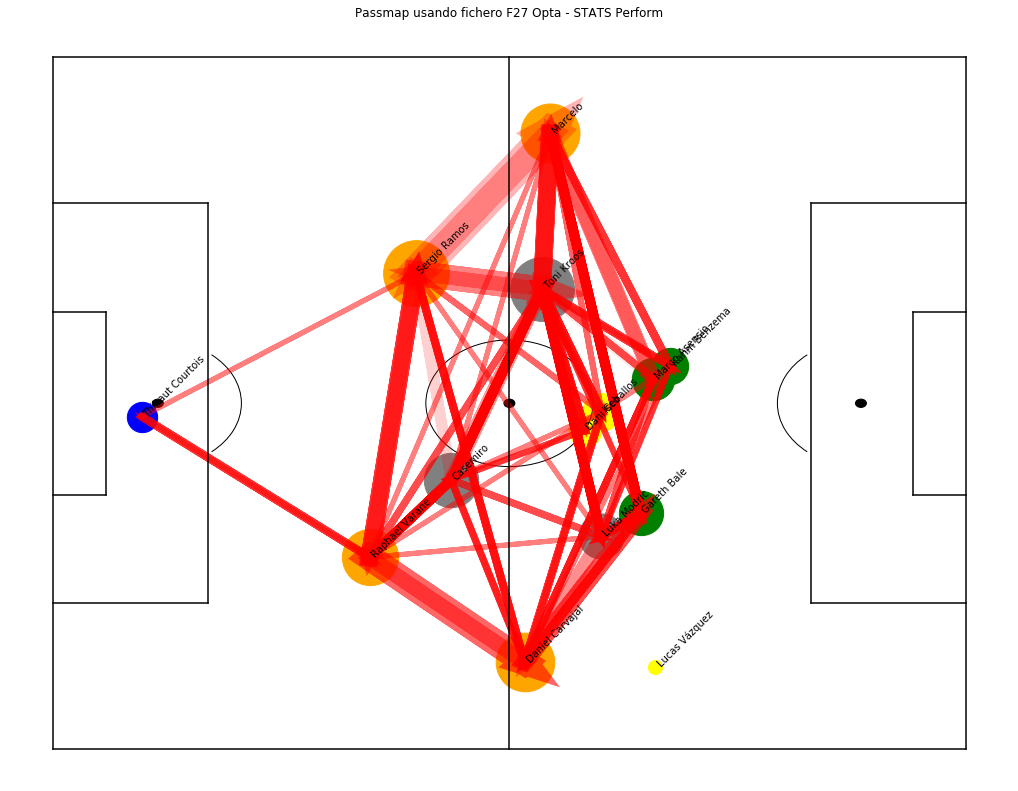

In [29]:
fig, ax = plt.subplots(figsize=(18,14))

# Flechas con los pases entre los jugadores con Plotter(passer, receiver, number)
for i in range(len(df)):
    Plotter(df.iloc[i,0], df.iloc[i,1], df.iloc[i,2])

# Posición Media Scatter Puntos con color en función de su demarcación
for i in range(len(P_Df)):
    ax.text(P_Df.iloc[i,1], P_Df.iloc[i,2], s = P_Df.iloc[i,0], rotation = 45, size = 10)
    if P_Df.iloc[i,3] == "Goalkeeper":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "blue")
    if P_Df.iloc[i,3] == "Forward":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "green")            
    if P_Df.iloc[i,3] == "Midfielder":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "grey")
    if P_Df.iloc[i,3] == "Defender":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "orange")
    if P_Df.iloc[i,3] == "Substitute":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "yellow")
  


# OPTA PITCH
# Pitch Outline & Centre Line 
plt.plot([0,0],[0,100], color="black")
plt.plot([0,100],[100,100], color="black") #upper line x_start x_end y_start y_end
plt.plot([100,100],[100,0], color="black")
plt.plot([100,0],[0,0], color="black")
plt.plot([50,50],[0,100], color="black")

# Left Penalty Area
plt.plot([17,17],[78.9,21.1],color="black")
plt.plot([0,17],[78.9,78.9],color="black")
plt.plot([17,0],[21.1,21.1],color="black")

# Right Penalty Area
plt.plot([100,83],[78.9,78.9],color="black")
plt.plot([83,83],[78.9,21.1],color="black")
plt.plot([83,100],[21.1,21.1],color="black")

# Left 6-yard Box
plt.plot([0,5.8],[63.2,63.2],color="black")
plt.plot([5.8,5.8],[63.2,36.8],color="black")
plt.plot([5.8,0],[36.8,36.8],color="black")

# Right 6-yard Box 
plt.plot([100,94.2],[63.2,63.2],color="black")
plt.plot([94.2,94.2],[63.2,36.8],color="black")
plt.plot([94.2,100],[36.8,36.8],color="black")

# Prepare Circles OK
centreCircle = plt.Circle((50,50),9.15,color="black",fill=False)
centreSpot = plt.Circle((50,50),0.6,color="black")
leftPenSpot = plt.Circle((11.5,50),0.6,color="black")
rightPenSpot = plt.Circle((88.5,50),0.6,color="black")

# Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

# Prepare Arcs based on penalty Spots 
leftArc = Arc((11.5,50),height=18.3,width=18.3,angle=0,
              theta1=310,theta2=50,color="black")
rightArc = Arc((88.5,50),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")


# Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

# Quitar Ejes
plt.axis("off")
plt.title("Passmap usando fichero F27 Opta - STATS Perform")

plt.show()

## Grafico Posición media basada en contactos con el balón

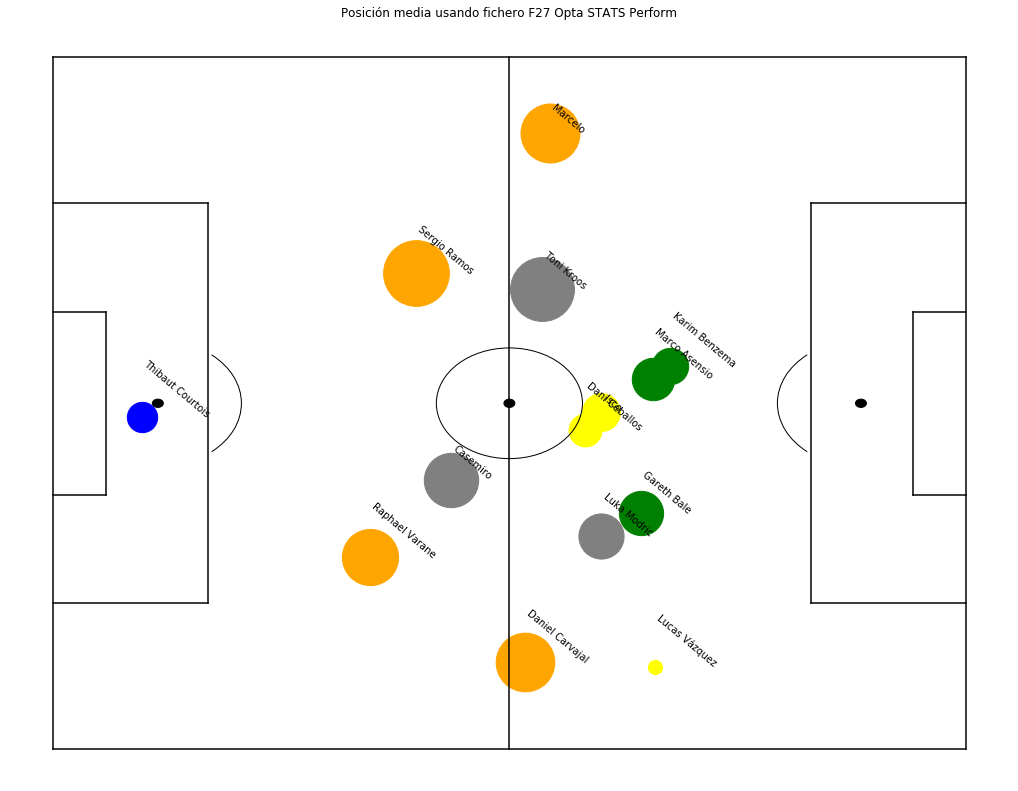

In [27]:
fig, ax = plt.subplots(figsize=(18,14))

# Posición Media Scatter Puntos con color en función de su demarcación
for i in range(len(P_Df)):
    ax.text(P_Df.iloc[i,1], P_Df.iloc[i,2], s = P_Df.iloc[i,0], rotation = -40, size = 10)
    if P_Df.iloc[i,3] == "Goalkeeper":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "blue")
    if P_Df.iloc[i,3] == "Forward":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "green")            
    if P_Df.iloc[i,3] == "Midfielder":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "grey")
    if P_Df.iloc[i,3] == "Defender":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "orange")
    if P_Df.iloc[i,3] == "Substitute":
        plt.scatter(x=P_Df.iloc[i,1], y = P_Df.iloc[i,2], s = P_Df.iloc[i,4]*40, zorder = 1, color = "yellow")
  


# OPTA PITCH
# Pitch Outline & Centre Line 
plt.plot([0,0],[0,100], color="black")
plt.plot([0,100],[100,100], color="black") #upper line x_start x_end y_start y_end
plt.plot([100,100],[100,0], color="black")
plt.plot([100,0],[0,0], color="black")
plt.plot([50,50],[0,100], color="black")

# Left Penalty Area
plt.plot([17,17],[78.9,21.1],color="black")
plt.plot([0,17],[78.9,78.9],color="black")
plt.plot([17,0],[21.1,21.1],color="black")

# Right Penalty Area
plt.plot([100,83],[78.9,78.9],color="black")
plt.plot([83,83],[78.9,21.1],color="black")
plt.plot([83,100],[21.1,21.1],color="black")

# Left 6-yard Box
plt.plot([0,5.8],[63.2,63.2],color="black")
plt.plot([5.8,5.8],[63.2,36.8],color="black")
plt.plot([5.8,0],[36.8,36.8],color="black")

# Right 6-yard Box 
plt.plot([100,94.2],[63.2,63.2],color="black")
plt.plot([94.2,94.2],[63.2,36.8],color="black")
plt.plot([94.2,100],[36.8,36.8],color="black")

# Prepare Circles OK
#centreCircle = plt.Circle((50,50),9.15,color="black",fill=False)
centreCircle = plt.Circle((50,50),8,color="black",fill=False)
centreSpot = plt.Circle((50,50),0.6,color="black")
leftPenSpot = plt.Circle((11.5,50),0.6,color="black")
rightPenSpot = plt.Circle((88.5,50),0.6,color="black")

# Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

# Prepare Arcs based on penalty Spots 
leftArc = Arc((11.5,50),height=18.3,width=18.3,angle=0,
              theta1=310,theta2=50,color="black")
rightArc = Arc((88.5,50),height=18.3,width=18.3,angle=0,
               theta1=130,theta2=230,color="black")


# Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

# Quitar Ejes
plt.axis("off")
plt.title("Posición media usando fichero F27 Opta STATS Perform")

plt.show()